# CNN with Keras 

## Import Library and Load MNIST Data

In [2]:
import keras
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
import matplotlib.pylab as plt

In [3]:
# We are using tensorflow-gpu so its best to test if its working
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In [4]:
#Load the MNIST dataset.
(X, y), (X_test,y_test) = mnist.load_data()

# Define HyperParameters and Initialize them

In [5]:
#We will need to tune this hyperparameter for best result. 
num_classes = 10
epochs = 10
batch_size = 128

# Preprocess the training data

## Reshape
Intialize height and width of the image. In case of MNIST data its 28x28

Reshape the MNIST data into 4D tensor (no_of_sample, width, height, channels)

MNIST image is in grayscale so channels will be 1 in our case.

## Convert the data into right type

Convert the data into float.

Divide it by 255 to normalize. Since color ranges from 0 to 255. 


In [6]:
#Initialize variable
width = 28
height = 28
no_channel = 1
input_shape = (width,height,no_channel)

#Reshape input
X = X.reshape(X.shape[0],width,height,no_channel)
X_test = X_test.reshape(X_test.shape[0],width,height,no_channel)

#Convert to float
X = X.astype('float32')
X_test = X_test.astype('float32')
                         
#Normalize
X = X/255
X_test = X_test/255   

print('x_train shape:', X.shape)
print(X.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
print(y.shape, 'output shape')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
(60000,) output shape


# Convert Output to one hot vector.

For example 3 would be represented by 1 at 3rd index of ten zeros where 1st one reperesent 0 and last 9. 

0001000000

In [7]:
y = keras.utils.to_categorical(y,num_classes=10)
y_test = keras.utils.to_categorical(y_test,num_classes=10)
print(y.shape,'output shape')

(60000, 10) output shape


# Define Keras Model and stack the layers 

<img src="https://github.com/AmitDeo/DeepLearning/raw/master/cnn/files/conv_unit.jpg">

This will have Conv Layer followed with relu activation. MaxPooling will be applied after that to subsample. 


In [8]:
#Define model
model = Sequential()

#Layer1 = Conv + relu + maxpooling
model.add(Conv2D(filters=32,kernel_size=(5,5),strides=(1,1),padding='same',activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))

#Layer2 = Conv + relu + maxpooling
model.add(Conv2D(filters=64,kernel_size=(5,5),strides=(1,1),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#Flatten
model.add(Flatten())

#Layer Fully connected
model.add(Dense(units=1000,activation='relu'))
model.add(Dense(units=num_classes,activation='softmax'))

#Compile model
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.categorical_crossentropy, 
              metrics=['accuracy'])

# Optional class for saving accuracy history

We will need the accuracy at each epoch to plot the graph

In [9]:
class AccuracyHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.acc = []

    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get('acc'))

history = AccuracyHistory()        

# Train the model

In [11]:
model.fit(x=X,
          y=y,
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          validation_data=(X_test,y_test), 
          callbacks=[history])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 64s 1ms/step - loss: 0.1386 - acc: 0.9584 - val_loss: 0.0398 - val_acc: 0.9869
Epoch 2/10
60000/60000 [==============================] - 57s 948us/step - loss: 0.0391 - acc: 0.9882 - val_loss: 0.0333 - val_acc: 0.9892
Epoch 3/10
60000/60000 [==============================] - 56s 941us/step - loss: 0.0247 - acc: 0.9920 - val_loss: 0.0276 - val_acc: 0.9910
Epoch 4/10
60000/60000 [==============================] - 56s 930us/step - loss: 0.0174 - acc: 0.9939 - val_loss: 0.0254 - val_acc: 0.9924
Epoch 5/10
60000/60000 [==============================] - 56s 929us/step - loss: 0.0142 - acc: 0.9953 - val_loss: 0.0231 - val_acc: 0.9916
Epoch 6/10
60000/60000 [==============================] - 57s 950us/step - loss: 0.0097 - acc: 0.9968 - val_loss: 0.0220 - val_acc: 0.9930
Epoch 7/10
60000/60000 [==============================] - 57s 949us/step - loss: 0.0080 - acc: 0.9973 - val_loss: 0.02

# Model Evaluation

In [12]:
testScore = model.evaluate(x=X_test,y=y_test,verbose=1)
print('Test loss:', testScore[0])
print('Test accuracy:', testScore[1])

10000/10000 [==============================] - 4s 369us/step
Test loss: 0.019496263597800406
Test accuracy: 0.9939


# Plot epoch vs accuracy.

Text(0,0.5,'Accuracy')

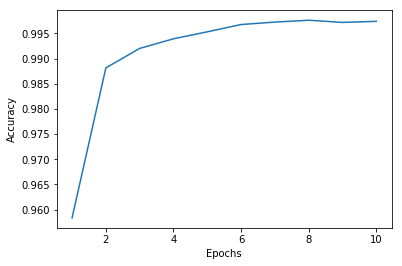

In [13]:
plt.plot(range(1,11),history.acc)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')